# Assignment 2: Heart Disease Prediction using Decision Tree
    Objective: Use the Heart Disease dataset to predict whether a person has heart disease based on various medical attributes.
    Task:
        1. Load the Heart Disease dataset.
        2. Perform basic data preprocessing (e.g., handling missing values).
        3. Split the data into training and testing sets (80% training, 20% testing).
        4. Train a Decision Tree Classifier.
        5. Plot the decision tree.
        6. Evaluate the model using accuracy, confusion matrix, and classification report.
        7. Test the classifier with the following input: [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]] (attributes represent age, sex, chest pain type, etc.).
    Expected Output:
        • Accuracy of the model
        • Confusion Matrix and Classification Report
        • Visualization of the Decision Tree
        • Prediction for the given input

In [21]:
import pandas as pd
import seaborn as sns

In [22]:
df_heart_failure = pd.read_csv('./../datafiles/heart_failure_clinical_records_dataset.csv')

df_heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [23]:
df_heart_failure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [24]:
X = df_heart_failure.drop(columns=['DEATH_EVENT'])
y = df_heart_failure['DEATH_EVENT']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [29]:
print(conf_matrix)

[[27  8]
 [14 11]]


In [30]:
print(class_report)

              precision    recall  f1-score   support

           0       0.66      0.77      0.71        35
           1       0.58      0.44      0.50        25

    accuracy                           0.63        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.63      0.63      0.62        60



array([0, 1])

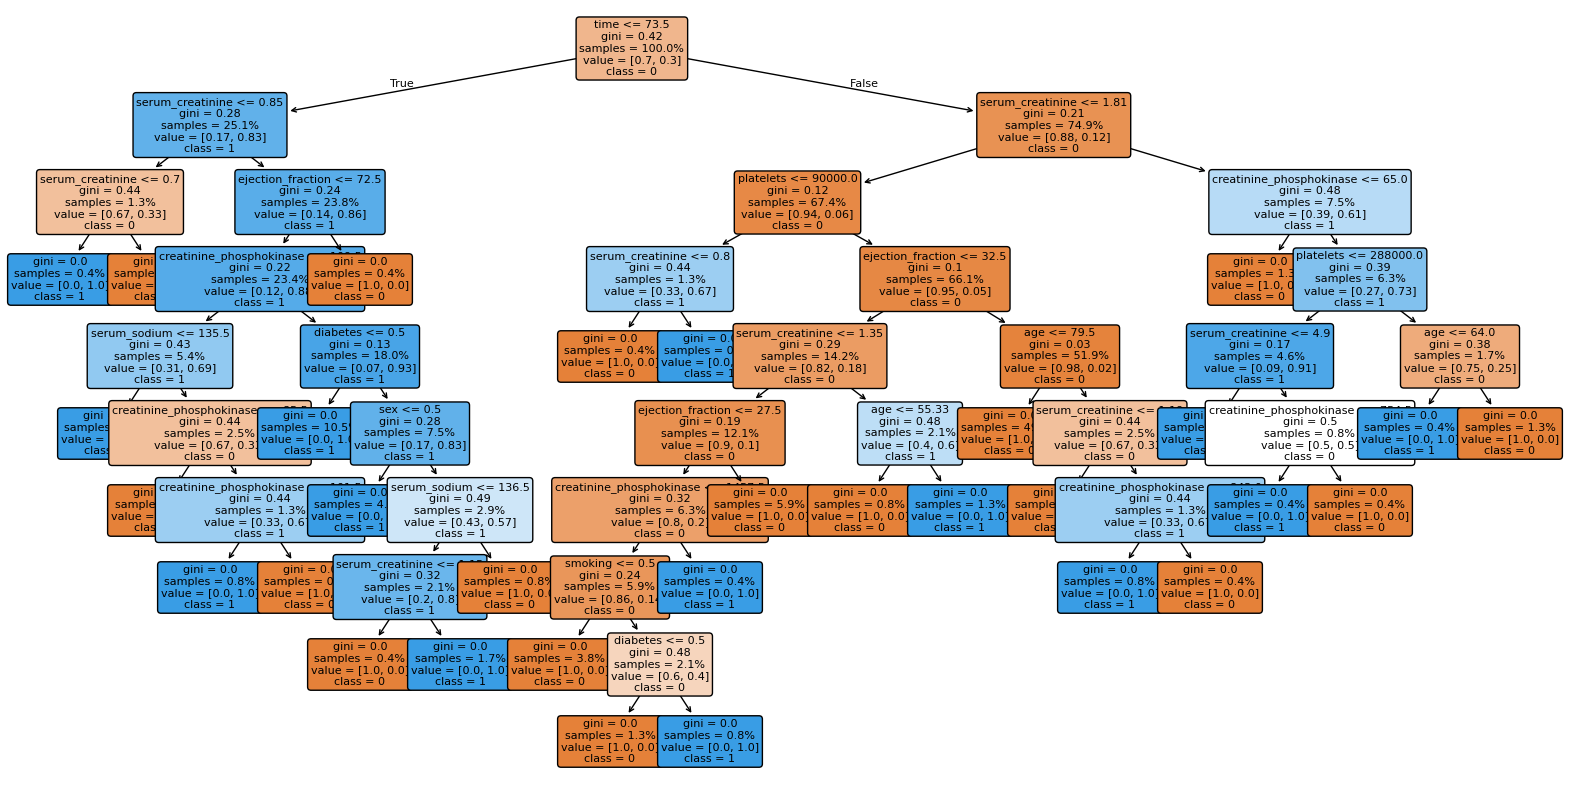

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Increase the figure size for better readability

# Plot the tree with detailed information
plot_tree(
    classifier, 
    class_names=classifier.classes_.astype(str),
    feature_names=X.columns, 
    filled=True, 
    rounded=True, 
    precision=2,  # Display precision for threshold values
    fontsize=8,   # Adjust font size for better readability
    proportion=True  # Show proportions of classes at each node
)
plt.savefig('DT2')
plt.show()

In [17]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [20]:
new_input = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0]]  

predicted_class = classifier.predict(new_input)
predicted_class

/home/darshan/dev/DR/training/AI_ML/ai_ml_venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])